<a href="https://colab.research.google.com/github/Pavitr-Swain/Heart-Disease-Prediction-/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Load the dataset
file_path = "/content/heart.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  )

In [7]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Drop duplicates if any exist
df_cleaned = df.drop_duplicates()

# Confirm duplicate removal
df_cleaned.info(), duplicate_count


<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


(None, 1)

In [8]:
# Mapping categorical values to meaningful labels
df_cleaned['sex'] = df_cleaned['sex'].map({0: 'Female', 1: 'Male'})
df_cleaned['cp'] = df_cleaned['cp'].map({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'})
df_cleaned['fbs'] = df_cleaned['fbs'].map({0: '≤ 120 mg/dl', 1: '> 120 mg/dl'})
df_cleaned['restecg'] = df_cleaned['restecg'].map({0: 'Normal', 1: 'ST-T Abnormality', 2: 'LV Hypertrophy'})
df_cleaned['exang'] = df_cleaned['exang'].map({0: 'No', 1: 'Yes'})
df_cleaned['slope'] = df_cleaned['slope'].map({0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'})
df_cleaned['thal'] = df_cleaned['thal'].map({1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'})

# Display the first few rows after transformation
df_cleaned.head()


<ipython-input-8-8fa81c3068cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sex'] = df_cleaned['sex'].map({0: 'Female', 1: 'Male'})
<ipython-input-8-8fa81c3068cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cp'] = df_cleaned['cp'].map({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'})
<ipython-input-8-8fa81c3068cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,> 120 mg/dl,Normal,150,No,2.3,Upsloping,0,Normal,1
1,37,Male,Non-Anginal Pain,130,250,≤ 120 mg/dl,ST-T Abnormality,187,No,3.5,Upsloping,0,Fixed Defect,1
2,41,Female,Atypical Angina,130,204,≤ 120 mg/dl,Normal,172,No,1.4,Downsloping,0,Fixed Defect,1
3,56,Male,Atypical Angina,120,236,≤ 120 mg/dl,ST-T Abnormality,178,No,0.8,Downsloping,0,Fixed Defect,1
4,57,Female,Typical Angina,120,354,≤ 120 mg/dl,ST-T Abnormality,163,Yes,0.6,Downsloping,0,Fixed Defect,1


<ipython-input-9-0f8e59c6d4ce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x="target", palette="coolwarm")


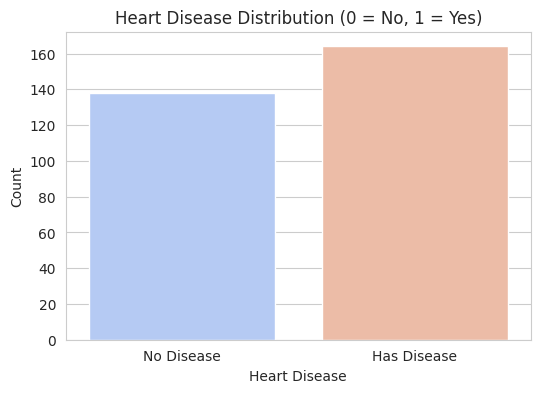

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot distribution of target variable (Heart Disease vs. No Heart Disease)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x="target", palette="coolwarm")
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Disease", "Has Disease"])
plt.show()


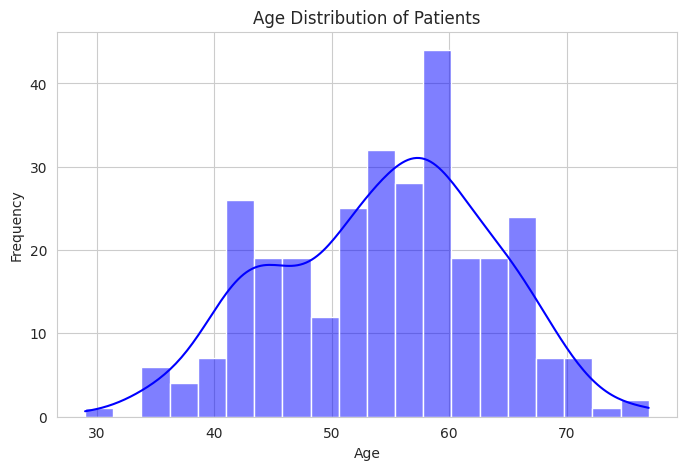

<ipython-input-10-1ed3b96ebca4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x="cp", palette="viridis", order=df_cleaned["cp"].value_counts().index)


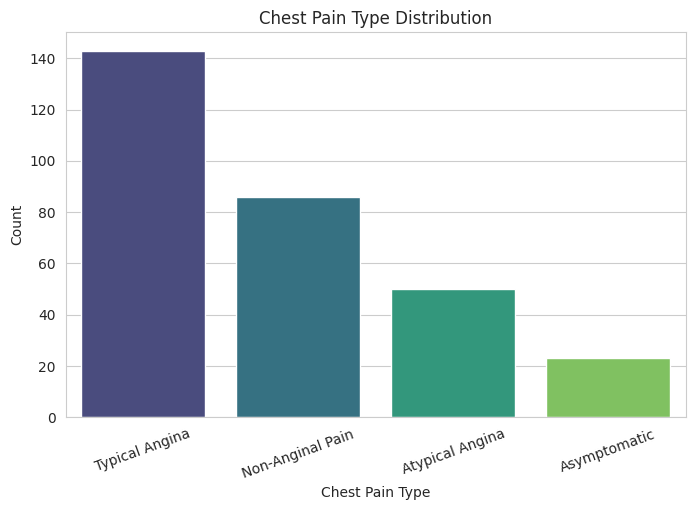

In [10]:
# Plot Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot Chest Pain Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="cp", palette="viridis", order=df_cleaned["cp"].value_counts().index)
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()


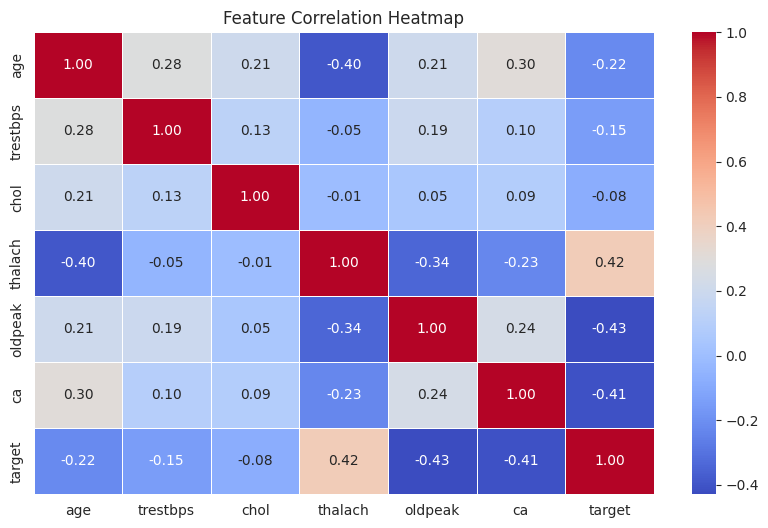

In [13]:
# Generate Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:

# Save the cleaned dataset
cleaned_file_path = "/content/heart_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as {cleaned_file_path}")


Cleaned dataset saved as /content/heart_cleaned.csv
